In [ ]:
#Limpeza e tratamento -> Melissa 230125

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [3]:
#importar dados
dataset = pd.read_csv("Churn.csv", sep=";")
#visulizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
#tamanho
dataset.shape

(999, 12)

In [5]:
#primeiro problema é dar nomes as colunas
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

In [6]:
#visulizar
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

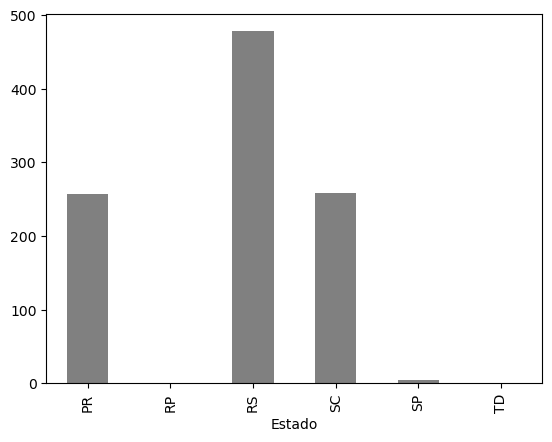

In [8]:
agrupado.plot.bar(color = 'gray')

In [9]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [ ]:
agrupado.plot.bar(color = 'gray')

In [10]:
#explorar colunas numéricas
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

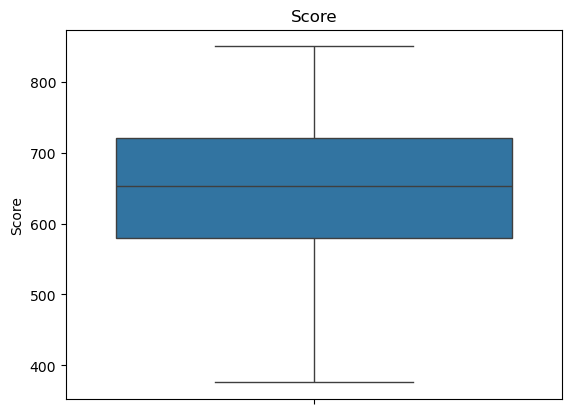

In [11]:
srn.boxplot(dataset['Score']).set_title('Score')

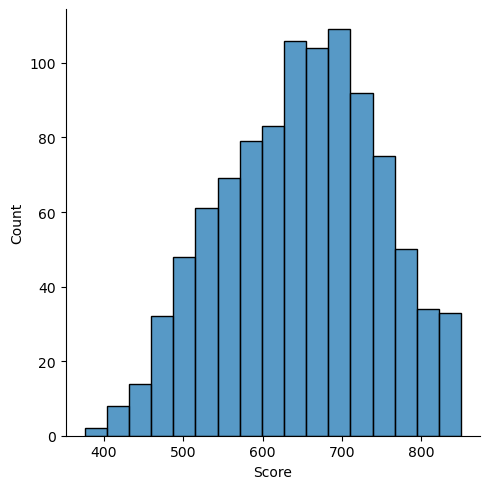

In [15]:
srn.displot(dataset['Score'])

In [16]:
#idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

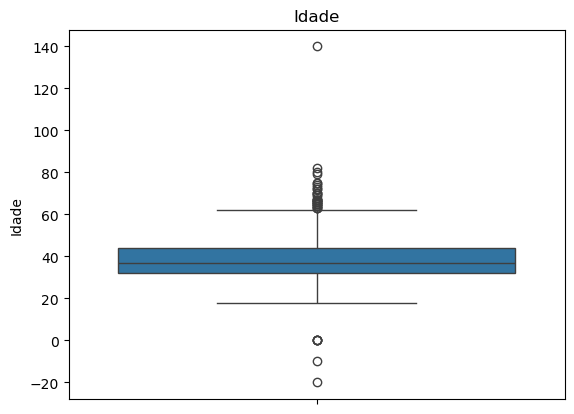

In [17]:
srn.boxplot(dataset['Idade']).set_title('Idade')

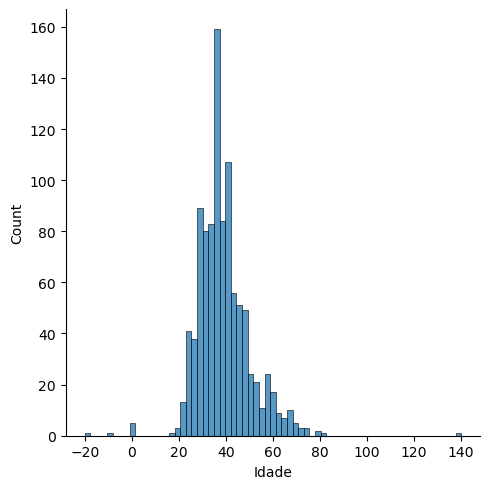

In [19]:
srn.displot(dataset['Idade'])

In [20]:
#saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

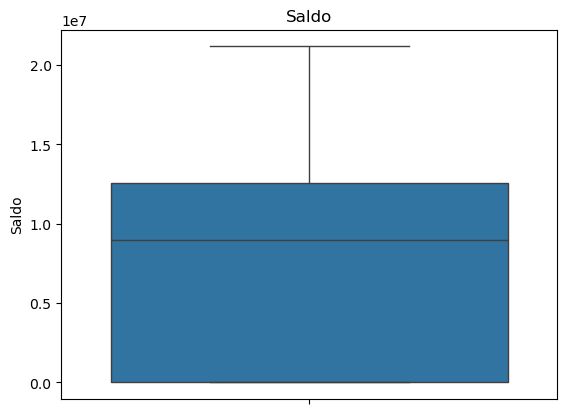

In [21]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

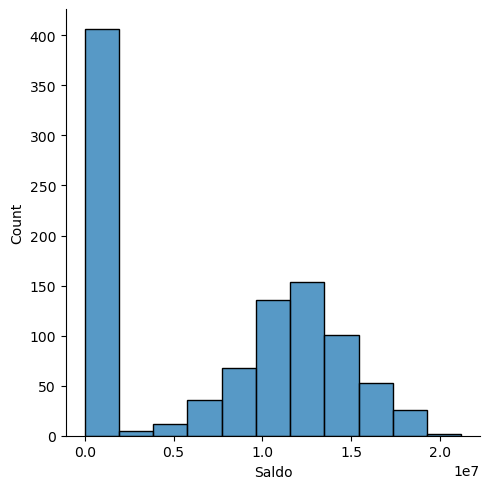

In [23]:
srn.displot(dataset['Saldo'])

In [24]:
#salário
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

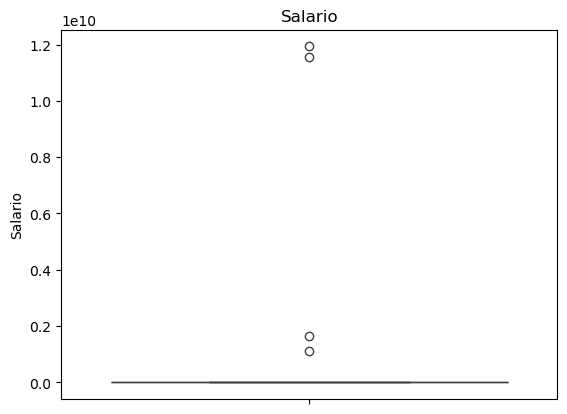

In [25]:
srn.boxplot(dataset['Salario']).set_title('Salario')

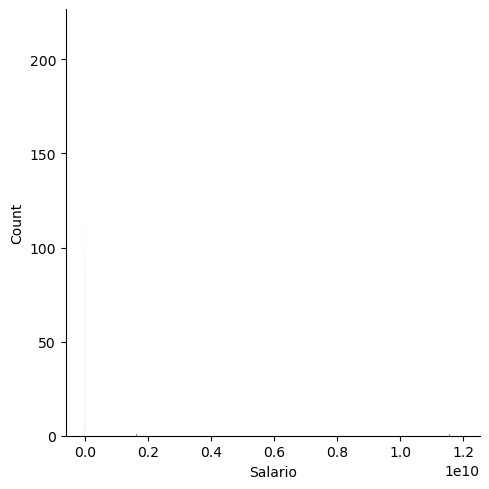

In [29]:
srn.displot(dataset['Salario'])

In [30]:
#contamos valores NAN
#genero e salário
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [31]:
#salarios
#remover nas e substiutir pela mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [32]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [34]:
#substituir NAN por mediana
dataset['Salario'].fillna(mediana)

0      10134888.0
1      11254258.0
2      11393157.0
3       9382663.0
4        790841.0
          ...    
994    14576583.0
995     8391224.0
996     7843973.0
997      677692.0
998      990342.0
Name: Salario, Length: 999, dtype: float64

In [35]:
#Verificamos se NAN não existem mais
dataset['Salario'].isnull().sum()

0

In [36]:
#genero, falta de padronização e NAs
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [53]:
#total de Nas
dataset['Genero'].isnull().sum()

8

In [66]:
#preenche NAs com Masculino (moda)
# Descobrir o valor mais frequente na coluna
#moda = dataset['Genero'].mode()[0]
# Preencher valores NaN com a moda
#dataset['Genero'] = dataset['Genero'].fillna(moda)

# Descobrir a moda (valor mais frequente)
moda = dataset['Genero'].mode()[0]

# Substituir 'Não informado' pela moda
dataset['Genero'] = dataset['Genero'].replace('Não informado', moda)



In [67]:
#verificamos novamente NANs
#dataset['Genero'].notnull().sum()
#dataset['Genero'].isna().sum()
# Filtrar linhas onde 'Genero' não seja "Feminino" nem "Masculino"
resultado = dataset[~dataset['Genero'].isin(['Feminino', 'Masculino'])]

# Exibir o resultado
print(resultado)
# Preencher valores NaN na coluna 'Genero' com 'Não informado'
#dataset['Genero'] = dataset['Genero'].fillna('Não informado')




      Id  Score Estado Genero  Idade  Patrimonio     Saldo  Produtos  \
6      7    822     RS      M     50           7         0         2   
15    16    616     PR      M     45           3  14312941         2   
20    21    732     RS      M     41           8         0         2   
119  121    699     PR      M     34           4  18517381         2   
131  133    795     PR      F     33           9  13086243         1   
141  143    663     RS    Fem     34           7         0         2   
958  960    531     SC      M     27           8  13257625         1   
973  975    750     SC      M     38           7   9725741         2   
988  990    659     SC      F     31           7  14962088         2   

     TemCartCredito  Ativo     Salario  Saiu  
6                 1      1    100628.0     0  
15                0      1   6432726.0     0  
20                1      1  17088617.0     0  
119               1      0  12083448.0     0  
131               1      1  11493521.0     0

In [68]:
#padroniza de acordo com o dominio
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
#visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [69]:
#idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [70]:
#visualizar 
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [71]:
#calular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [72]:
#substituir
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

In [73]:
#verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [74]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [75]:
#excluimso pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [76]:
#estado foram do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [77]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [78]:
#verificamos o resultado
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [79]:
#outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [80]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [81]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [82]:
#atribumos
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [83]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [84]:
dataset.shape

(998, 12)